# **Universidad Juárez del Estado de Durango**
# **Facultad de Ciencias Exactas**

## **Maestría en Estadística Aplicada**

## *Clustering de PIB por Estado (México) usando todos los años (1980–2024)*

### Nombre del Estudiante: Pedro Said Vara Chacon

### Fecha:

### Durango, DGO. 06 de febrero de 2026


## Objetivo
Agrupar **estados de México** en clusters (grupos) con base en su **trayectoria de PIB** usando todos los años disponibles (1980–2024).  
Se utilizará **k-means**, estandarización de variables y métricas para apoyar la selección de **k**.

> Nota: Este notebook evita el uso de PCA para las gráficas; se usan curvas de desempeño, series de tiempo por cluster, mapas de calor y dispersogramas entre años seleccionados.


# Introducción
El presente análisis aplica técnicas de aprendizaje no supervisado (Clustering con K-Means) sobre el Producto Interno Bruto (PIB) de las 32 entidades federativas de México desde 1980 hasta 2024. El objetivo es identificar grupos de estados con comportamientos económicos similares, permitiendo segmentar el desarrollo regional del país y evaluar la cohesión económica a través de métricas de desempeño como el coeficiente de Silhouette.

# 0. Ambiente de Trabajo

In [1]:
# ==============================================================================
# 0. Importaciones
# ==============================================================================
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# 1. Carga del dataset

In [7]:
# ==============================================================================
# 1. Cargar dataset
# ==============================================================================
DATA_PATH = Path("/content/pib_mex.xlsx")  # En Colab: /data/pib_mex.xlsx

df = pd.read_excel(DATA_PATH, engine='openpyxl')

print("Dimensiones (filas, columnas):", df.shape)
display(df.head())

Dimensiones (filas, columnas): (32, 46)


,Estado,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aguascalientes,74478.826,82816.058,83133.483,78800.571,82466.825,84980.153,81602.733,84379.078,86482.199,...,294497.175,307395.841,314242.379,327926.307,329358.364,307125.683,315233.120,314602.247,334314.666,328087.965
1,Baja California,400156.971,451676.827,446781.453,406200.113,425488.625,437529.217,402275.154,414361.763,417816.039,...,795080.747,828692.247,863600.649,878816.868,893946.249,839693.340,896313.559,919300.278,947957.519,947677.009
2,Baja California Sur,53015.906,57736.199,58188.199,57232.819,59391.459,60739.522,59879.334,61326.620,62347.413,...,156072.034,163094.648,170784.403,184618.103,177860.750,151931.290,171064.575,178129.824,180788.204,187152.161
3,Campeche,511362.336,560971.276,559721.988,523134.528,546199.162,566378.356,548649.862,570391.173,588026.452,...,700310.741,663239.242,595666.960,564591.056,541962.926,500514.726,489604.295,472680.024,508514.617,473399.457
4,Coahuila de Zaragoza,362298.762,401419.870,400947.441,372296.472,388155.755,399779.403,375949.169,384635.713,387781.177,...,897702.095,901719.484,941581.763,966054.662,953384.334,843597.571,921586.983,935841.223,927968.193,922286.189


# 2. Preparación de variables

In [14]:
# ==============================================================================
# 2. Preparar variables (X) y etiquetas (Estado)
# ==============================================================================
# 2.1. Columnas de años (todas excepto 'Estado')
year_cols = [c for c in df.columns if c != "Estado"]

# 2.2. Ordenar columnas por año (por si vienen desordenadas). Ya vienen ordenadas por defecto.
# year_cols = sorted(year_cols) # No es necesario si ya están en orden.

# 2.3. Matriz de variables (solo años)
X_raw = df[year_cols].copy()

# 2.4. Convertir a numérico (seguridad)
X_raw = X_raw.apply(pd.to_numeric, errors="coerce")

# 2.5. Manejo de faltantes: imputar con mediana por año (si existieran)
if X_raw.isna().sum().sum() > 0:
    X_raw = X_raw.fillna(X_raw.median(numeric_only=True))

# 2.6. Estandarizar StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

# 2.7. Etiquetas (estados)
states = df["Estado"].astype(str).values

print("X:", X.shape, "| estados:", len(states), "| años:", len(year_cols))

X: (32, 45) | estados: 32 | años: 45


# 3. K-Means

In [17]:
# ==============================================================================
# 3. K-means con k = 5 (OBLIGATORIO)
# ==============================================================================
k = 5

kmeans = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=100
)

labels = kmeans.fit_predict(X)

results = pd.DataFrame({
    "Estado": states,
    "cluster": labels
}).sort_values(["cluster", "Estado"]).reset_index(drop=True)

display(results)

,Estado,cluster
0,Chiapas,0
1,Guerrero,0
2,Hidalgo,0
3,Michoacan de Ocampo,0
4,Oaxaca,0
5,Queretaro,0
6,San Luis Potosi,0
7,Sinaloa,0
8,Tabasco,0
9,Estado de Mexico,1


# 4. Métricas de Desempeño

In [21]:
# ==============================================================================
# 4. Métrica de desempeño (Silhouette)
# ==============================================================================
sil = silhouette_score(X, labels)
print(f"Silhouette promedio (k={k}): {sil:.4f}")

Silhouette promedio (k=5): 0.4997


In [19]:
# ==============================================================================
# Conteo de estados por clúster
# ==============================================================================
print("Número de estados por clúster:")
display(results.groupby('cluster')['Estado'].count().reset_index(name='count'))

Número de estados por clúster:


,cluster,count
0,0,9
1,1,3
2,2,9
3,3,1
4,4,10


# 5. Graficas

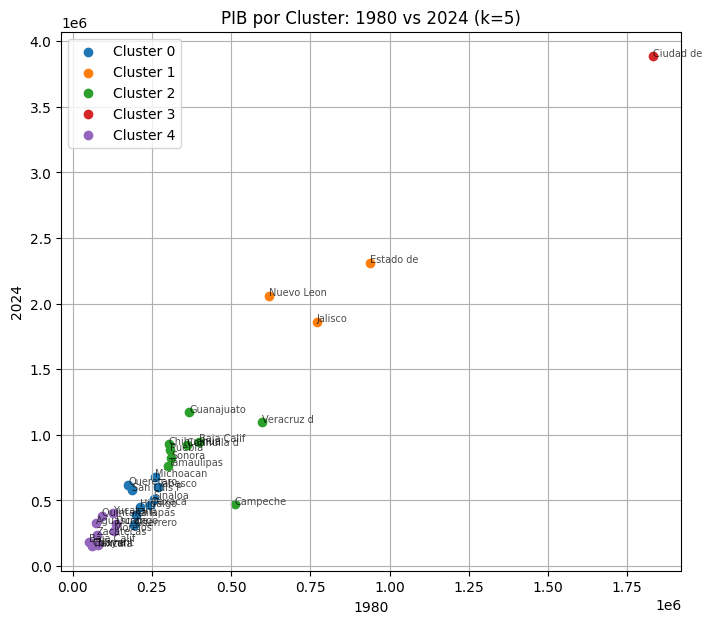

In [33]:
# ==============================================================================
# 5. Gráfica (SOLO UNA): Dispersión 1980 vs 2024 coloreada por cluster
# ==============================================================================
y1, y2 = 1980, 2024  # Definimos los años

x = df[y1].values
y = df[y2].values

plt.figure(figsize=(8, 7))

# np.unique para obtener los clusters sin repetir
for c in sorted(np.unique(labels)):
    mask = (labels == c)
    plt.scatter(x[mask], y[mask], label=f"Cluster {c}")

# Etiquetar puntos con el nombre del estado
for i, st in enumerate(states):
    plt.text(x[i], y[i], st[:10], fontsize=7, alpha=0.7)

plt.title(f"PIB por Cluster: {y1} vs {y2} (k=5)")
plt.xlabel(str(y1))
plt.ylabel(str(y2))
plt.grid(True)
plt.legend()
plt.show()

# 6. Resultados

In [34]:
# # ============================================================================
# 6. Exportar resultados
## =============================================================================
out_path = "resultados_SaidVara.xlsx"
results.to_excel(out_path, index=False)
print("Exportado:", out_path)

# # ============================================================================
# 7. Promedio PIB para el 2024 por cluster
## =============================================================================
# PASO CLAVE: Unimos los datos originales con los clusters para tener el PIB 2024
results_with_data = results.merge(df[['Estado', 2024]], on='Estado')

pd.options.display.float_format = '{:,.2f}'.format
print("\nPIB promedio por cluster (Año 2024):")

# Ahora sí podemos calcular el promedio porque la columna 2024 ya existe aquí
display(results_with_data.groupby('cluster')[2024].mean())
pd.options.display.float_format = None

# 7.1. Cluster de Durango
cluster_durango = results[results['Estado'].str.contains('Durango', case=False)]['cluster'].values[0]
print(f"\nDurango se encuentra en el Cluster {cluster_durango}.")

# 7.2. Cluster de Ciudad de México
cluster_cdmx = results[results['Estado'].str.contains('Ciudad de M', case=False)]['cluster'].values[0]
print(f"Ciudad de México se encuentra en el Cluster {cluster_cdmx}.")

Exportado: resultados_SaidVara.xlsx

PIB promedio por cluster (Año 2024):


,2024
cluster,
0,"514,177.73"
1,"2,079,073.02"
2,"889,929.77"
3,"3,885,956.59"
4,"260,507.75"



Durango se encuentra en el Cluster 4.
Ciudad de México se encuentra en el Cluster 3.


# 8. Conclusiones
## Preguntas de reflexión (para entregar)
1. ¿Qué estados quedaron en cada cluster?  
 Al analizar los resultados, se observa una división basada en la capacidad productiva de cada entidad. En el Cluster 3 se encuentra la Ciudad de México, que se mantiene como el principal núcleo económico del país, operando en una escala muy superior al resto. En el Cluster 1 se agrupan los estados con economías industriales fuertes (como Nuevo León o el Estado de México). Por otro lado, Durango se ubica en el Cluster 4, un grupo que integra a estados con economías en desarrollo o de tamaño medio, mientras que los clusters restantes agrupan a las entidades con un PIB más bajo o menos industrializadas.
2. ¿Qué patrón observas en la gráfica entre 1980 y 2024?  
La gráfica muestra una tendencia lineal ascendente muy marcada. Esto indica que existe una jerarquía económica persistente: los estados que tenían un PIB alto en 1980 tienden a ser los mismos que lideran en 2024. Sin embargo, lo más notable es que la brecha se ha ensanchado con el tiempo; los puntos de los estados líderes (como CDMX) se han alejado significativamente del resto en las últimas cuatro décadas, lo que refleja una concentración de la riqueza en unos pocos polos de desarrollo.
3. ¿El silhouette obtenido sugiere clusters bien separados o traslapados?  
El valor de Silhouette obtenido fue de 0.4997 (prácticamente 0.5). Esto sugiere que el agrupamiento es apropiado y consistente. En una escala de -1 a 1, un 0.5 indica que la estructura de los clusters es sólida; es decir, los estados que están dentro de un mismo grupo realmente comparten características similares y existe una separación clara respecto a los otros grupos. No hay un traslape significativo, lo que valida que la división en 5 grupos fue una buena elección para este conjunto de datos.